In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from matplotlib import font_manager as fm, rcParams
%matplotlib inline

In [213]:
# Read in data
df = pd.read_excel("fn_data-1.xlsx")

In [214]:
# Create new date variable to MM-YYYY
df["Month"]=df["Month"].str.strip()
df["Date"] = pd.to_datetime(df["Month"] + df["Year"].astype(str), format="%b%Y").dt.strftime('%m-%Y') 

#Remove deaths per million columns
df2=df.drop(["AMR_Zymotic_diseases","AMR_Wounds_injuries", "AMR_Other", "Month", "Year"],axis=1)


In [215]:
#Reshape dataframe
df3 = df2.melt(id_vars=["Date","Average_Army_Size"], 
               value_vars = ["Deaths_Zymotic_Diseases","Deaths_Wounds_Injuries","Deaths_Other"],
              var_name="cod", value_name="N")

#New variable for marker size
df3["ms"] = 10*df3["N"]

#List of causes of death in string format
cod_labels = ["Zymotic Diseases", "Wounds and Injuries", "Other Causes"]

cmap = plt.cm.coolwarm
norm = matplotlib.colors.Normalize(vmin=0, vmax=2000)


In [216]:
prop = fm.FontProperties(fname="SaucyJack.ttf")

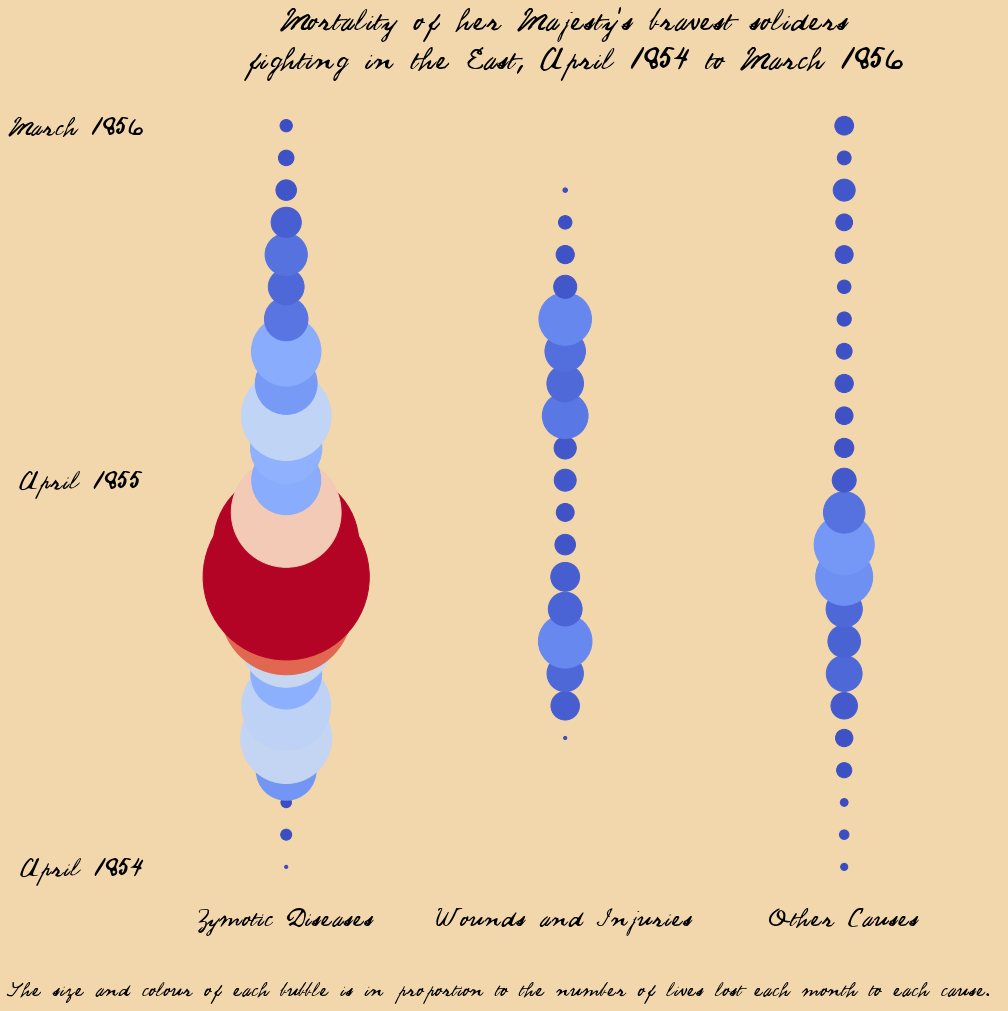

In [223]:
bg = "#f2d7ac" 
fig, ax = plt.subplots(1,1,figsize=[15,15],facecolor=bg)
ax.set_facecolor(bg)


bubbles = ax.scatter(x=df3["cod"],y=df3["Date"], s=df3["ms"],c=cmap(norm(df3["N"].values)))


ax.set_xticklabels(cod_labels,fontproperties=prop,fontsize=25)


ax.set_yticks(["04-1854","04-1855","03-1856"])
ax.set_yticklabels(["April 1854","April 1855","March 1856"],fontproperties=prop,fontsize=25)

ax.text(-1,-4,"The size and colour of each bubble is in proportion to the number of lives lost each month to each cause. ",
        fontproperties=prop,fontsize=20)

plt.title("Mortality of her Majesty's bravest soliders\n fighting in the East, April 1854 to March 1856",
          fontproperties=prop,fontsize=30,pad=20 )

sns.despine(left=True, bottom=True, right=True)
ax.tick_params(length=0)

In [258]:

df3.reset_index()

,index,Date,Average_Army_Size,cod,N,ms
0,0,04-1854,8571,Deaths_Zymotic_Diseases,1,10
1,1,05-1854,23333,Deaths_Zymotic_Diseases,12,120
2,2,06-1854,28333,Deaths_Zymotic_Diseases,11,110
3,3,07-1854,28722,Deaths_Zymotic_Diseases,359,3590
4,4,08-1854,30246,Deaths_Zymotic_Diseases,828,8280
5,5,09-1854,30290,Deaths_Zymotic_Diseases,788,7880
6,6,10-1854,30643,Deaths_Zymotic_Diseases,503,5030
7,7,11-1854,29736,Deaths_Zymotic_Diseases,844,8440
8,8,12-1854,32779,Deaths_Zymotic_Diseases,1725,17250
9,9,01-1855,32393,Deaths_Zymotic_Diseases,2761,27610
